# Logistic Regression Implementation

### PreProcess Data

In [8]:
import SL_API as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
imp.reload(pre)
X_test, y_test, X_train_split, y_train_split, X_valid, y_valid, X_train, y_train = pre.PreProcessData()
modelAnalyzer = pre.ModelAnalysis()

### Class Construction

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted_per = self.sigmoid(linear_model)
        return np.array(y_predicted_per)

### Model Construction

In [3]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

### Get Model Results

Accuracy: 0.7233042310275353
F1 Score: 0.7994157740993184
Precision: 0.7463636363636363
NPV: 0.6580976863753213
Recall: 0.860587002096436
Specificity: 0.4785046728971963


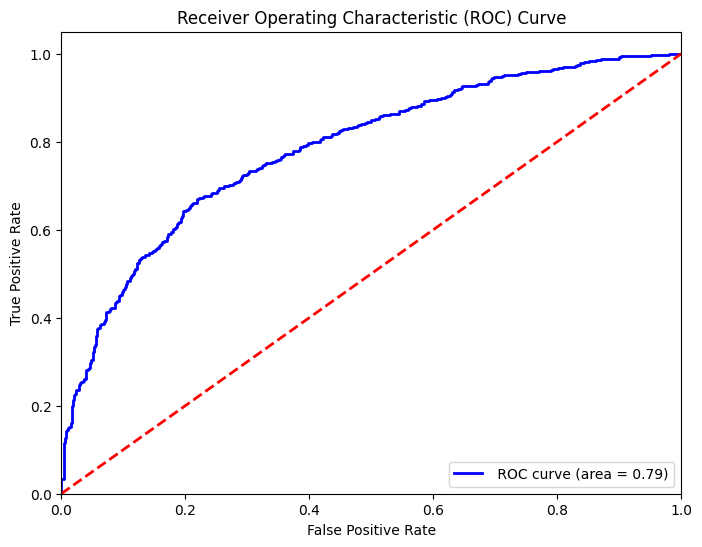

In [4]:
y_predicted_per = model.predict(X_valid)
modelAnalyzer.printPrediction(y_predicted_per, y_valid)
modelAnalyzer.plot_roc_auc(y_predicted_per, y_valid)

### Get Model Plot

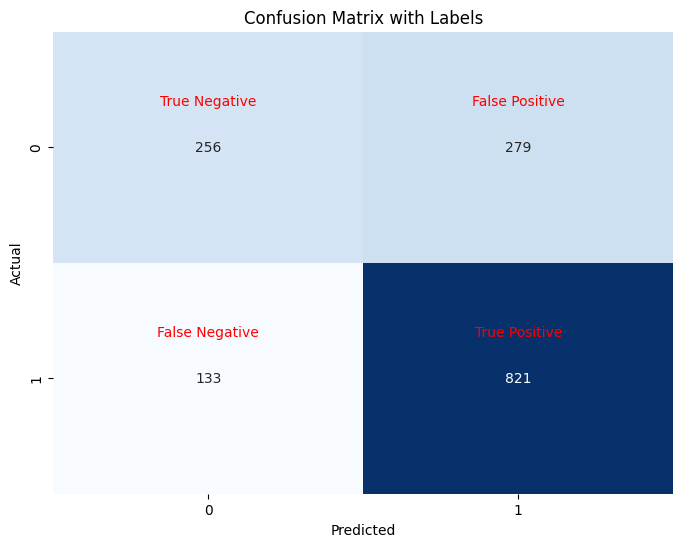

In [5]:
modelAnalyzer.plot(y_predicted_per, y_valid)

### Learning Rate 0.02 Model

In [ ]:
model02 = LogisticRegression(learning_rate=0.02, num_iterations=1000)
model02.fit(X_train, y_train)

Accuracy: 0.7286769644056413
F1 Score: 0.8011811023622046
Precision: 0.7551020408163265
NPV: 0.6593673965936739
Recall: 0.8532494758909853
Specificity: 0.5065420560747663


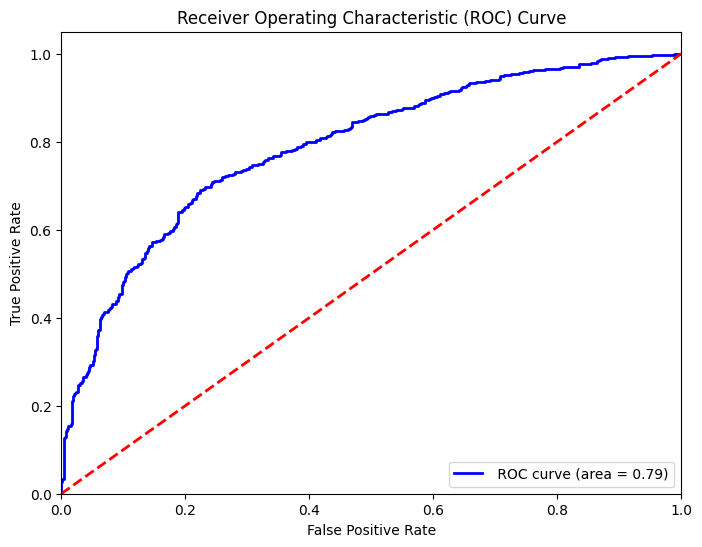

In [11]:
y_pred02 = model02.predict(X_valid)
modelAnalyzer.printPrediction(y_pred02, y_valid)
modelAnalyzer.plot_roc_auc(y_pred02, y_valid)

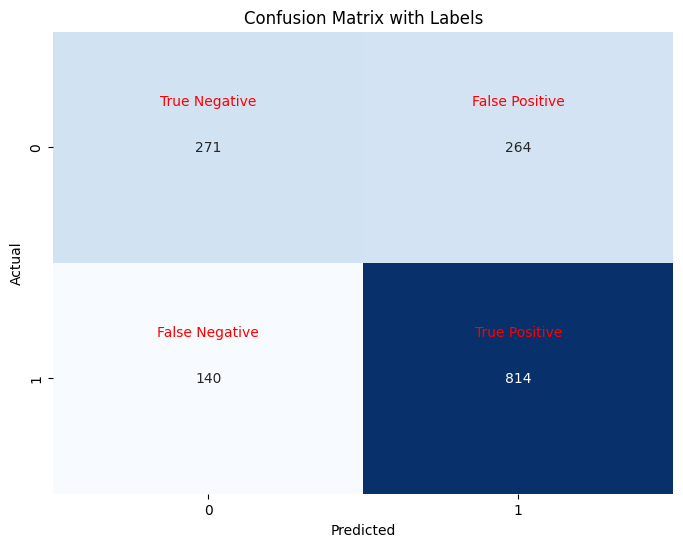

In [12]:
modelAnalyzer.plot(y_pred02, y_valid)

### Learning Rate 0.03 Model

In [13]:
model03 = LogisticRegression(learning_rate=0.03, num_iterations=1000)
model03.fit(X_train, y_train)

Accuracy: 0.7300201477501679
F1 Score: 0.8019704433497536
Precision: 0.7565055762081785
NPV: 0.6610169491525424
Recall: 0.8532494758909853
Specificity: 0.5102803738317757


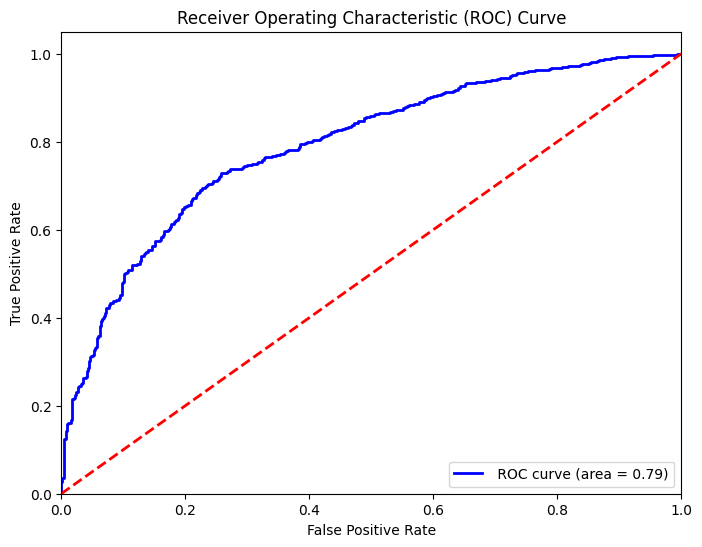

In [14]:
y_pred03 = model03.predict(X_valid)
modelAnalyzer.printPrediction(y_pred03, y_valid)
modelAnalyzer.plot_roc_auc(y_pred03, y_valid)

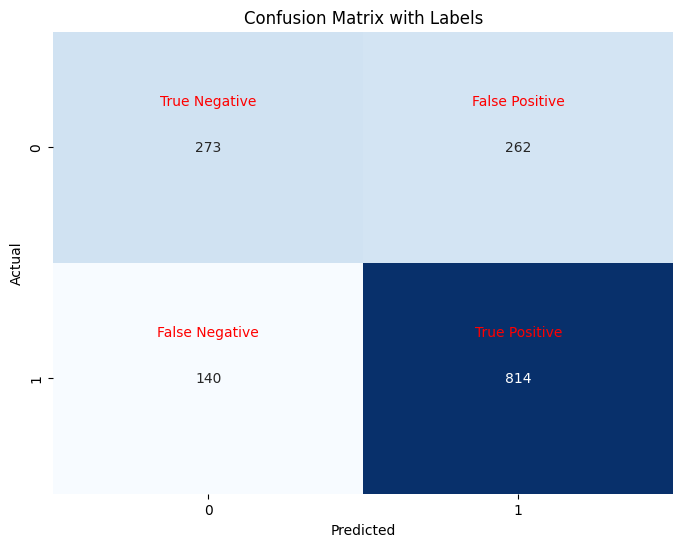

In [15]:
modelAnalyzer.plot(y_pred03, y_valid)

### 1200 iterations, 0.03 learning rate Model

In [34]:
model1200 = LogisticRegression(learning_rate=0.03, num_iterations=1200)
model1200.fit(X_train, y_train)

Accuracy: 0.7286769644056413
F1 Score: 0.8007889546351085
Precision: 0.7560521415270018
NPV: 0.6578313253012048
Recall: 0.8511530398322851
Specificity: 0.5102803738317757


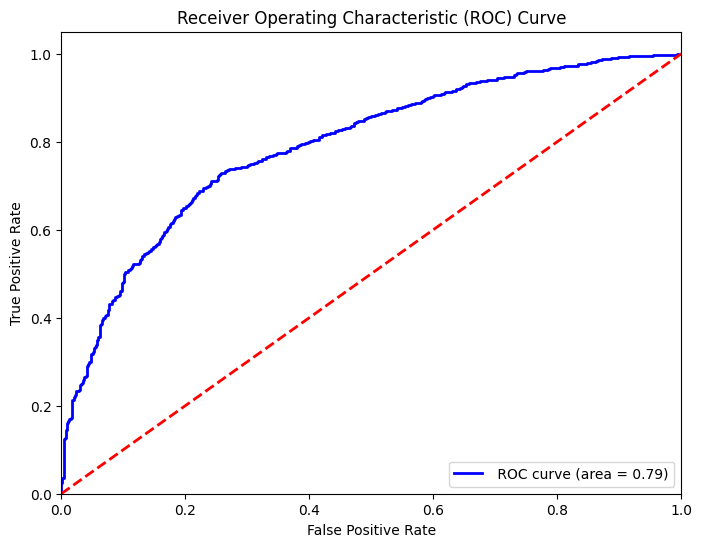

In [35]:
y_pred1200 = model1200.predict(X_valid)
modelAnalyzer.printPrediction(y_pred1200, y_valid)
modelAnalyzer.plot_roc_auc(y_pred1200, y_valid)

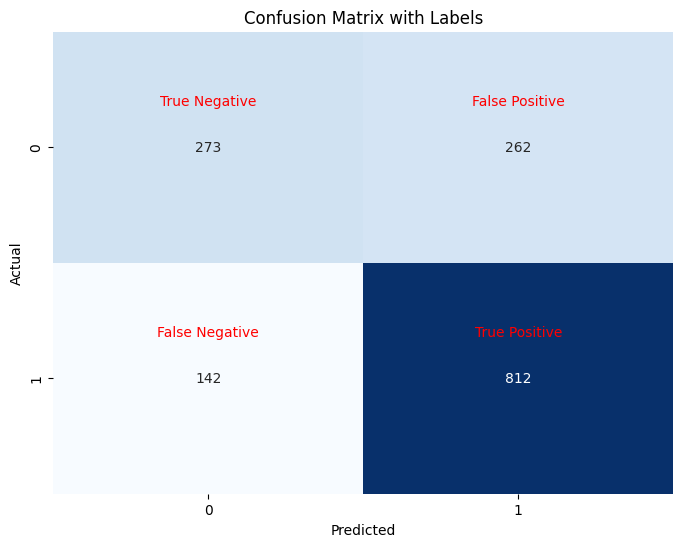

In [36]:
modelAnalyzer.plot(y_pred1200, y_valid)

### 1390 iterations, 0.02 learning rate Model

In [37]:
model1390 = LogisticRegression(learning_rate=0.02, num_iterations=1390)
model1390.fit(X_train, y_train)

Accuracy: 0.7313633310946944
F1 Score: 0.8029556650246304
Precision: 0.7574349442379182
NPV: 0.6634382566585957
Recall: 0.8542976939203354
Specificity: 0.5121495327102804


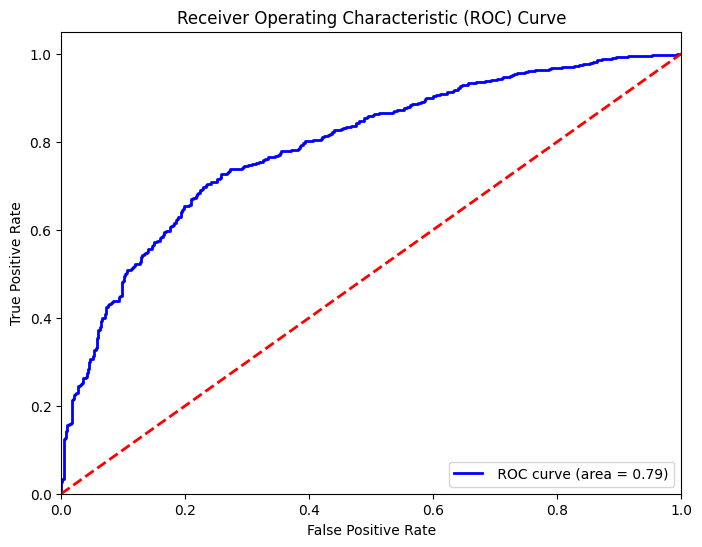

In [38]:
y_pred1390 = model1390.predict(X_valid)
modelAnalyzer.printPrediction(y_pred1390, y_valid)
modelAnalyzer.plot_roc_auc(y_pred1390, y_valid)

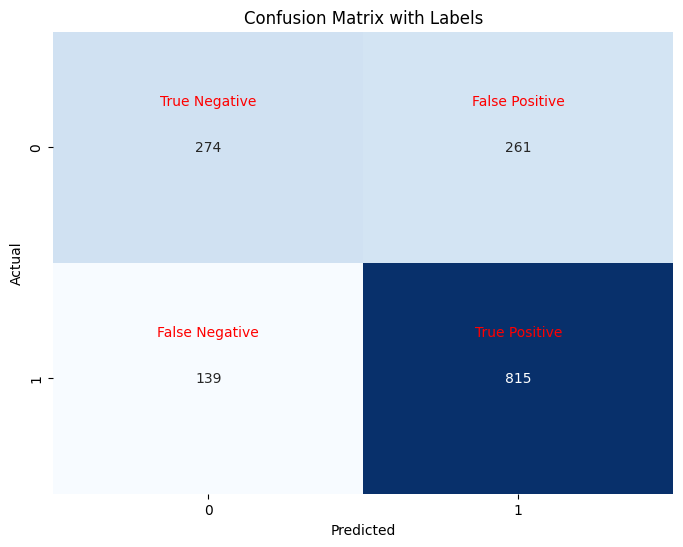

In [39]:
modelAnalyzer.plot(y_pred1390, y_valid)

### Make the best Model have a Higher (recall/specificity ratio) with Youden index

In [40]:
best_threshold = modelAnalyzer.youdenIndex(y_pred1390, y_valid)
modelAnalyzer.printPrediction(y_pred1390, y_valid, threshold=best_threshold)

Model Logistic Regression: Best Threshold = 0.641, Youden Index = 0.469
Accuracy: 0.7253190060443251
F1 Score: 0.7661520869068038
Precision: 0.8427672955974843
NPV: 0.590778097982709
Recall: 0.7023060796645703
Specificity: 0.7663551401869159


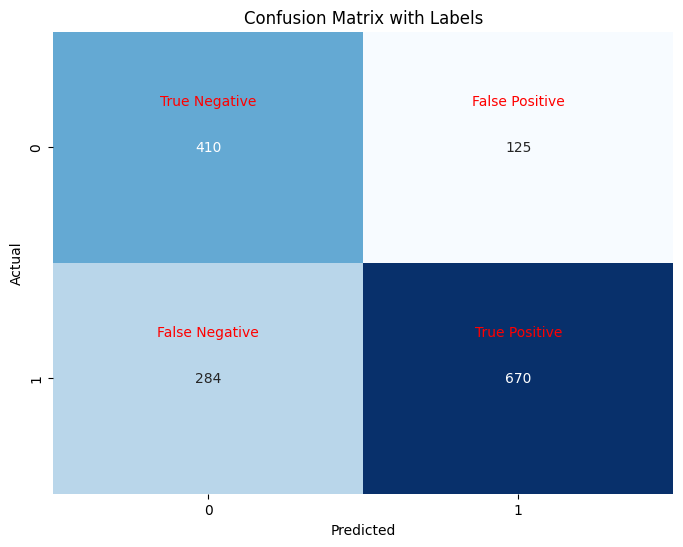

In [41]:
modelAnalyzer.plot(y_pred1390, y_valid, threshold=best_threshold)

### Test Best Model on Test Data

In [42]:
modelTest = LogisticRegression(learning_rate=0.02, num_iterations=1390)
modelTest.fit(X_train_split, y_train_split)

Accuracy: 0.7293485560779046
F1 Score: 0.8007909045971329
Precision: 0.7563025210084033
NPV: 0.6602870813397129
Recall: 0.8508403361344538
Specificity: 0.5139664804469274


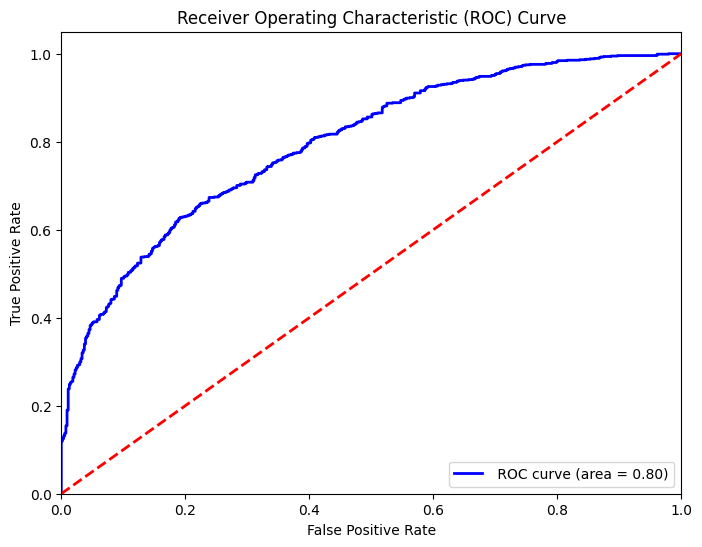

In [43]:
y_predTest = modelTest.predict(X_test)
modelAnalyzer.printPrediction(y_predTest, y_test)
modelAnalyzer.plot_roc_auc(y_predTest, y_test)

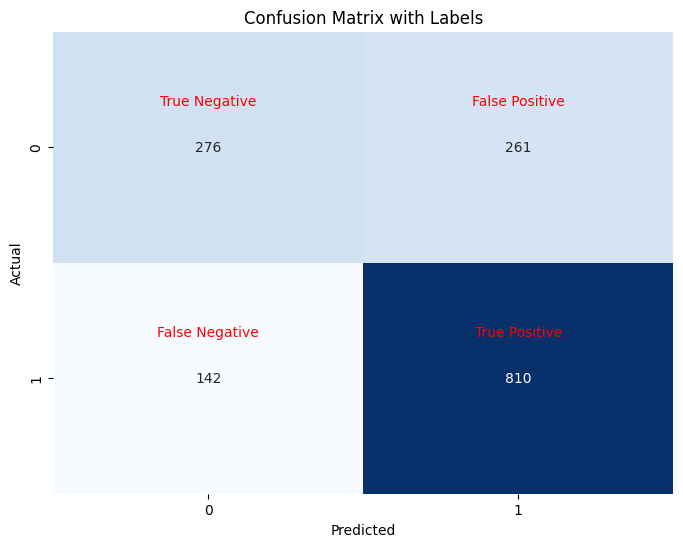

In [45]:
modelAnalyzer.plot(y_predTest, y_test)